<a href="https://colab.research.google.com/github/Khushil-Modi/SJSU/blob/main/255_Data_Mining_Assinment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Google Drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Libs and dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import sklearn as sk

# Data Load: Load Bitcoin Historical Data into a Dataframe

In [4]:
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/bitcoindataset.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape #returns dimensions of the dataset

(4857377, 8)

In [6]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [7]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [8]:
data.dtypes #provides type of datatypes and column names in dataset

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [9]:
data.info() #tells relevant information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


# Data Cleaning: Handling NA values
###There are multiple ways of dealing with missing data some of which are as follows:
######1) Dropping missing data (if the data dropped does not impact or skew our data)
######2) Setting to missing and impute with statistical measures (median, mean, mode ...)
######3) Imputing with more complex algorithmic/machine learning based approaches
######4) Impute based on business assumptions of our data



In [10]:
data.isna()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


In [11]:
data.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [12]:
data.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

#Dropping NaN values 

In [13]:
data.dropna(inplace = True)
print(data)

          Timestamp      Open  ...  Volume_(Currency)  Weighted_Price
0        1325317920      4.39  ...           2.000000        4.390000
478      1325346600      4.39  ...         210.720000        4.390000
547      1325350740      4.50  ...         171.380338        4.526411
548      1325350800      4.58  ...          41.220000        4.580000
1224     1325391360      4.58  ...           6.879160        4.580000
...             ...       ...  ...                ...             ...
4857372  1617148560  58714.31  ...       81259.372187    58692.753339
4857373  1617148620  58683.97  ...      428158.146640    58693.226508
4857374  1617148680  58693.43  ...      100117.070370    58696.198496
4857375  1617148740  58742.18  ...       42332.958633    58761.866202
4857376  1617148800  58767.75  ...      159417.751000    58764.349363

[3613769 rows x 8 columns]


In [14]:
data.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [16]:
data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

# Converting Unix Time to readbale format

In [17]:
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [18]:
# Resampling to daily frequency
data.index = data.Timestamp
data = data.resample('D').mean()

# Resampling to monthly frequency
data_month = data.resample('M').mean()

# Resampling to annual frequency
data_year = data.resample('A-DEC').mean()

# Resampling to quarterly frequency
data_Q = data.resample('Q-DEC').mean()
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [19]:
data.shape # Data is preprocessed for the model to predict Bitcoin value

(3379, 7)

In [20]:
data.isnull().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         3
Volume_(Currency)    3
Weighted_Price       3
dtype: int64

In [22]:
data.dropna(inplace = True)
print(data)

                    Open          High  ...  Volume_(Currency)  Weighted_Price
Timestamp                               ...                                   
2011-12-31      4.465000      4.482500  ...         106.330084        4.471603
2012-01-01      4.806667      4.806667  ...          35.259720        4.806667
2012-01-02      5.000000      5.000000  ...          95.240000        5.000000
2012-01-03      5.252500      5.252500  ...          58.100651        5.252500
2012-01-04      5.200000      5.223333  ...          63.119577        5.208159
...                  ...           ...  ...                ...             ...
2021-03-27  55193.240643  55219.665031  ...      100884.732367    55193.357260
2021-03-28  55833.608471  55857.735342  ...       80632.115263    55832.958824
2021-03-29  56914.886595  56946.213593  ...      213754.555988    56913.993819
2021-03-30  58347.805624  58371.955310  ...      138231.241926    58346.912268
2021-03-31  58767.750000  58778.180000  ...      159

In [23]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [24]:
data.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

#Plots

A graph of Bitcoin price over the years


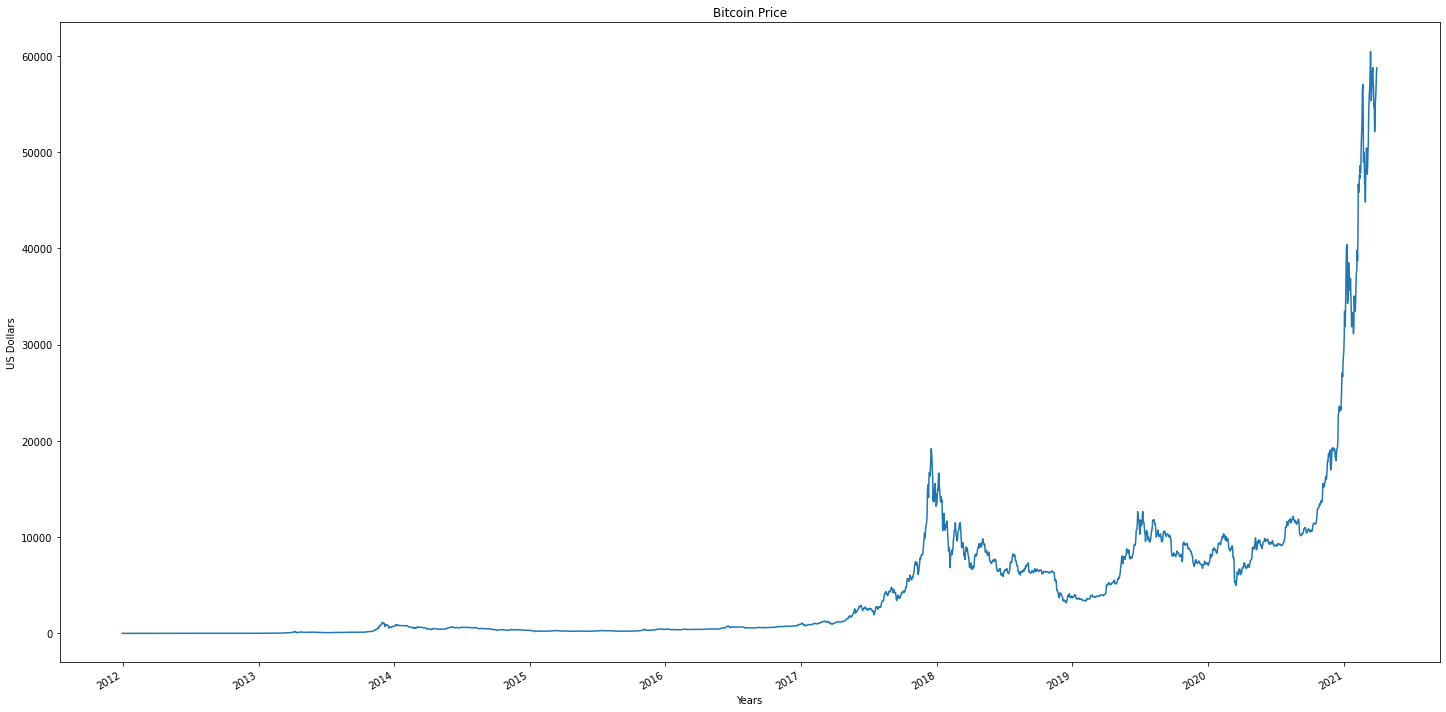

In [25]:
data.Weighted_Price.plot(title = "Bitcoin Price", figsize=(20,10))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


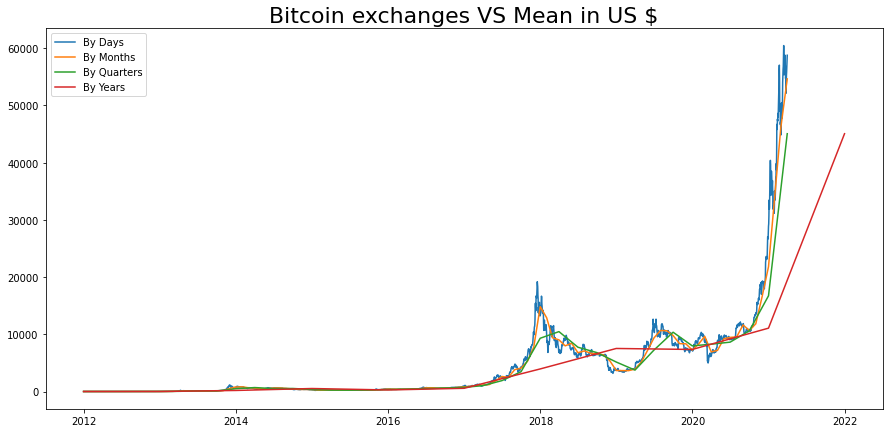

In [26]:
fig = plt.figure(figsize=[15, 7])
plt.title('Bitcoin exchanges VS Mean in US $', fontsize=22)
plt.subplot()
plt.plot(data.Weighted_Price, '-', label='By Days')
plt.plot(data_month.Weighted_Price, '-', label='By Months')
plt.plot(data_Q.Weighted_Price, '-', label='By Quarters')
plt.plot(data_year.Weighted_Price, '-', label='By Years')
plt.legend()
plt.show()

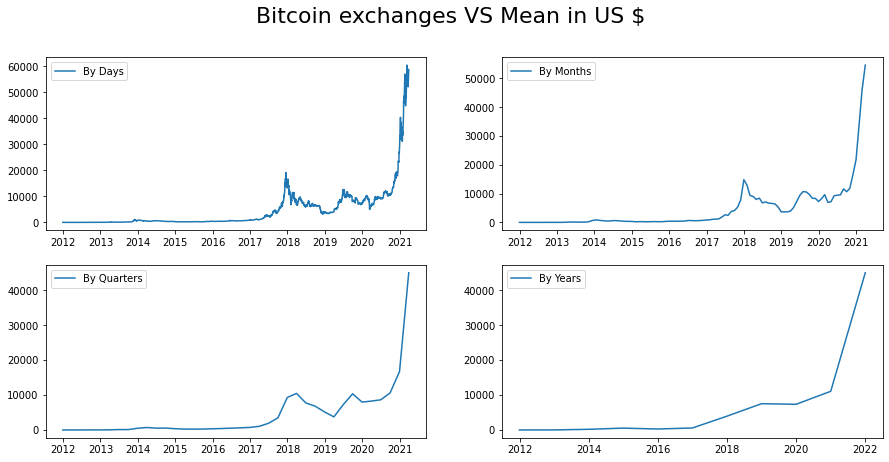

In [27]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges VS Mean in US $', fontsize=22)

plt.subplot(221)
plt.plot(data.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(data_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(data_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(data_year.Weighted_Price, '-', label='By Years')
plt.legend()

plt.show()

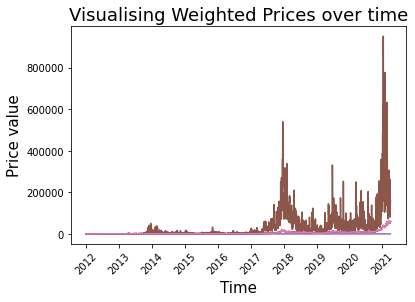

In [28]:
plt.plot(data)
plt.title('Visualising Weighted Prices over time',fontsize=18)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Price value',fontsize=15)
plt.xticks(rotation=45)
plt.show()

#Using Scikit Learn for model training

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 

data = sc.fit_transform(np.array(data).reshape(-1,1)) #Normalising values using Standard Scaler

data[:5]

array([[-0.29406104],
       [-0.29406038],
       [-0.29406104],
       [-0.29406038],
       [-0.29333363]])

Splitting the data into training and testing

In [30]:
training_size = int(len(data)*0.65)

training_data = data[0:training_size,:]
testing_data = data[training_size:,:]

print(training_data.shape)
print(testing_data.shape)

(15360, 1)
(8272, 1)


Here two lists are created for X and Y.The first value of the dataset is added in X and the second value is added in Y because our current prediction depends on the previous value i.e the timestamp here is 1.Now as the loop continues the second values is then appended in X and third value in Y and so on.Once we reach at the end of the loop the last value of X will be the second last value of our dataset and last value of Y will be the last value of our dataset.

In [31]:
def create_dataset(data,timestamp=1):
    X=[]
    Y=[]
    
    for i in range(len(data)-timestamp-1):
        a = data[i:(i+timestamp)]
        X.append(a)
        
        Y.append(data[i+timestamp])
        
    return np.array(X),np.array(Y)

In [32]:
timestamp=1
X_train,Y_train = create_dataset(training_data,timestamp)
x_test,y_test = create_dataset(testing_data,timestamp)

print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15358, 1, 1)
(15358, 1)
(8270, 1, 1)
(8270, 1)


In [33]:
print(X_train[:6])

print(Y_train[:6])

[[[-0.29406104]]

 [[-0.29406038]]

 [[-0.29406104]]

 [[-0.29406038]]

 [[-0.29333363]]

 [[-0.29023458]]]
[[-0.29406038]
 [-0.29406104]
 [-0.29406038]
 [-0.29333363]
 [-0.29023458]
 [-0.29406079]]


Creating LSTM model for prediction

In [34]:
from tensorflow.keras import models
from tensorflow.keras.layers import LSTM,Dense,Dropout

model = models.Sequential()

model.add(LSTM(50,return_sequences = True,input_shape = (5,1),activation='relu'))
model.add(LSTM(25,return_sequences = True))
model.add(LSTM(16,return_sequences = True))
model.add(LSTM(10,return_sequences = False))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 25)             7600      
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 16)             2688      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1080      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 21,779
Trainable params: 21,779
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(X_train,Y_train,epochs=10,batch_size=64,validation_split=0.35)

Epoch 1/10
156/156 [==============================] - 1s 7ms/step - loss: 0.0067 - val_loss: 0.5240
Epoch 2/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5234
Epoch 3/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5254
Epoch 4/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5236
Epoch 5/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5242
Epoch 6/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5227
Epoch 7/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5205
Epoch 8/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5256
Epoch 9/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5247
Epoch 10/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.5268

# References
https://www.kaggle.com/mczielinski/bitcoin-historical-data/code?datasetId=1346&sortBy=voteCount #Dataset

https://colab.research.google.com/github/adelnehme/cleaning-data-in-python-live-training/blob/master/Cleaning_Data_in_Python_live_session.ipynb

https://colab.research.google.com/github/KrishnaswamyLab/SingleCellWorkshop/blob/master/exercises/Preprocessing/notebooks/01_Loading_and_preprocessing_your_own_data.ipynb

https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima

https://www.youtube.com/watch?v=T18rp49owgM

https://www.kaggle.com/varunsharma20/bitcoin-price-prediction-using-lstm-s